### Classifying and predicting early hospital readmissions:

Classifying with supervised learning whether diabetic patients are readmitted, and if they are, if it's before or after 30 days.

Using the dataset from here: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

In [1]:
%matplotlib inline
import matplotlib.cm as cm
import random

# Import tree stuff:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

import pandas as pd
import patsy as patsy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# SMOTE
from imblearn.over_sampling import SMOTE

# Undersampling
from imblearn.under_sampling import RandomUnderSampler

# Import other models:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Bagging:
from sklearn.ensemble import BaggingClassifier

# Searching hyperparameters and cross-validating
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics

import pickle

In [2]:
with open("x_liv.pkl", 'rb') as picklefile: 
    x_liv = pickle.load(picklefile)

with open("y_liv.pkl", 'rb') as picklefile: 
    y_liv = pickle.load(picklefile)

In [3]:
with open("y_train_liv.pkl", 'rb') as picklefile: 
    y_train_liv = pickle.load(picklefile)

with open("y_test_liv.pkl", 'rb') as picklefile: 
    y_test_liv = pickle.load(picklefile)

with open("x_train_liv.pkl", 'rb') as picklefile: 
    x_train_liv = pickle.load(picklefile)

with open("x_test_liv.pkl", 'rb') as picklefile: 
    x_test_liv = pickle.load(picklefile)

with open("x_train_scaled_liv.pkl", 'rb') as picklefile: 
    x_train_scaled_liv = pickle.load(picklefile)

with open("x_test_scaled_liv.pkl", 'rb') as picklefile: 
    x_test_scaled_liv = pickle.load(picklefile)
    
with open("x_scaled_liv.pkl", 'rb') as picklefile: 
    x_scaled_liv = pickle.load(picklefile)

with open("patientdataICD9_liv.pkl", 'rb') as picklefile: 
    patientdataICD9_liv = pickle.load(picklefile)

In [4]:
x_train = x_train_liv
y_train = y_train_liv
x_test = x_test_liv
y_test = y_test_liv
x = x_liv
y = y_liv

In [5]:
y = y.str.replace('>30','NO')
y_test = y_test.str.replace('>30','NO')
y_train = y_train.str.replace('>30','NO')

In [6]:
y.unique()

array(['NO', '<30'], dtype=object)

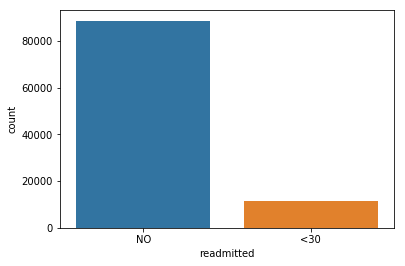

In [7]:
sns.countplot(y)

In [8]:
y.value_counts()

NO     88757
<30    11357
Name: readmitted, dtype: int64

In [9]:
# pulling these in from pickle now

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [10]:
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

#linearsvc = LinearSVC()
# Do the test 10 times with a LinearSVC and get the average score
#quick_test_afew_times(linearsvc, X, y1)

#### Decision tree and random forest:

In [11]:
decisiontree = DecisionTreeClassifier(max_depth=2)
quick_test_afew_times(decisiontree, x, y)

# using x train and x test with x that had been scaled before test-train split:
# 0.5664330167048804

0.8868386881971034

In [12]:
randomforest = RandomForestClassifier()
quick_test_afew_times(randomforest, x, y)

# using x train and x test with x that had been scaled before test-train split:
# 0.5488994431706519

/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8811386715498586

In [13]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.880
              precision    recall  f1-score   support

         <30       0.26      0.03      0.06      2839
          NO       0.89      0.99      0.94     22190

   micro avg       0.88      0.88      0.88     25029
   macro avg       0.58      0.51      0.50     25029
weighted avg       0.82      0.88      0.84     25029



#### SMOTE:

In [14]:
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_sample(x_train, y_train)

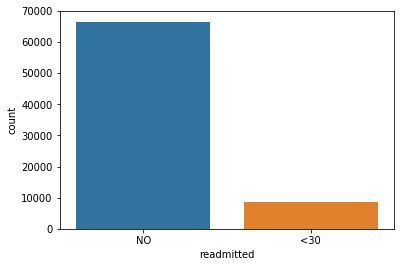

In [15]:
sns.countplot(y_train);

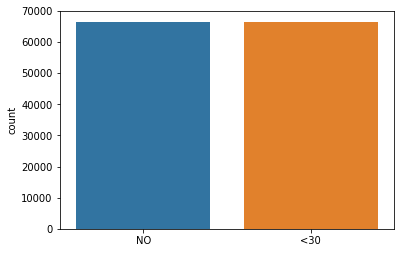

In [16]:
sns.countplot(y_train_smote);

In [17]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train_smote, y_train_smote)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

/Users/etheredgej/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.878
              precision    recall  f1-score   support

         <30       0.27      0.05      0.08      2839
          NO       0.89      0.98      0.93     22190

   micro avg       0.88      0.88      0.88     25029
   macro avg       0.58      0.52      0.51     25029
weighted avg       0.82      0.88      0.84     25029



In [18]:
randomforest = RandomForestClassifier(n_estimators=200, min_samples_split=10)
randomforest.fit(x_train_smote, y_train_smote)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.887
              precision    recall  f1-score   support

         <30       0.59      0.00      0.01      2839
          NO       0.89      1.00      0.94     22190

   micro avg       0.89      0.89      0.89     25029
   macro avg       0.74      0.50      0.47     25029
weighted avg       0.85      0.89      0.83     25029



#### Undersampling:

In [19]:
rus = RandomUnderSampler(random_state=0)
x_train_undersampled, y_train_undersampled = rus.fit_sample(x_train, y_train)

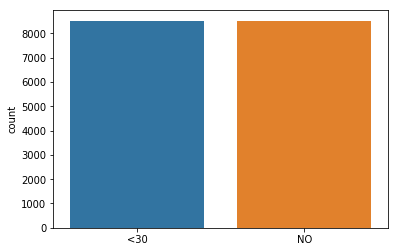

In [20]:
sns.countplot(y_train_undersampled);

In [21]:
randomforest = RandomForestClassifier(n_estimators=200)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.616
              precision    recall  f1-score   support

         <30       0.17      0.64      0.27      2839
          NO       0.93      0.61      0.74     22190

   micro avg       0.62      0.62      0.62     25029
   macro avg       0.55      0.63      0.51     25029
weighted avg       0.84      0.62      0.69     25029



In [22]:
randomforest = RandomForestClassifier(n_estimators=200)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.616
              precision    recall  f1-score   support

         <30       0.17      0.63      0.27      2839
          NO       0.93      0.61      0.74     22190

   micro avg       0.62      0.62      0.62     25029
   macro avg       0.55      0.62      0.51     25029
weighted avg       0.84      0.62      0.69     25029



In [23]:
class_weights = {}
class_weights['NO'] = 1
class_weights['<30'] = 0.15
randomforest = RandomForestClassifier(n_estimators=200, class_weight = class_weights, min_samples_split=10)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.859
              precision    recall  f1-score   support

         <30       0.29      0.17      0.22      2839
          NO       0.90      0.95      0.92     22190

   micro avg       0.86      0.86      0.86     25029
   macro avg       0.60      0.56      0.57     25029
weighted avg       0.83      0.86      0.84     25029

[[  494  2345]
 [ 1187 21003]]


model.train(x_train, y_train)
y_pred = model.predict(x_test)
metrics.confusion_matrix(y_test, pred)

thresholding:
y_pred_proba = model.predict_proba(x_test)
y_pred = y_pred_proba >= 0.25 (this is the value to play around with)
metrics.confusion_matrix(y_test, y_pred)
plot prec and recall by threshold
metrics.precision_recall_curve

underfit = adding complexity helps
overfit = adding complexity hurts

In [24]:
randomforest = RandomForestClassifier(n_estimators=200, min_samples_split=10)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.625
              precision    recall  f1-score   support

         <30       0.18      0.63      0.28      2839
          NO       0.93      0.62      0.75     22190

   micro avg       0.62      0.62      0.62     25029
   macro avg       0.55      0.63      0.51     25029
weighted avg       0.84      0.62      0.69     25029



In [25]:
model = randomforest
y_pred_proba = model.predict_proba(x_test)
y_pred = y_pred_proba >= 0.25 #(this is the value to play around with)
#y_pred
#print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
#metrics.confusion_matrix(y_test, y_pred)
#plot prec and recall by threshold

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [ ]:
randomforest = RandomForestClassifier(n_estimators=200, min_samples_split=20)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

In [ ]:
randomforest = RandomForestClassifier(n_estimators=1000, min_samples_split=10)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

In [ ]:
# tune random forest hyperparameters
# try grid-search CV
# try ensembling with the RBF

#### Extra-random trees:

In [ ]:
extraforest = ExtraTreesClassifier(n_estimators=200, min_samples_split=10)
extraforest.fit(x_train_undersampled, y_train_undersampled)
extraforest.score(x_test, y_test)
y_pred = extraforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

In [ ]:
extraforest = ExtraTreesClassifier(n_estimators=2000)
extraforest.fit(x_train_undersampled, y_train_undersampled)
extraforest.score(x_test, y_test)
y_pred = extraforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

In [ ]:
for n_estimator in range(100, 2000, 100):
    extraforest = ExtraTreesClassifier(n_estimators=n_estimator)
    extraforest.fit(x_train_undersampled, y_train_undersampled)
    extraforest.score(x_test, y_test)
    y_pred = extraforest.predict(x_test)
    print("Number of estimators: %.3f"% n_estimator)
    print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))

#### Boosted trees:

In [ ]:
# boosted no resampling

boostforest = AdaBoostClassifier(n_estimators=200)
boostforest.fit(x_train, y_train)
boostforest.score(x_test, y_test)
y_pred = boostforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

In [ ]:
# boosted undersampled

boostforest = AdaBoostClassifier(n_estimators=200)
boostforest.fit(x_train_undersampled, y_train_undersampled)
boostforest.score(x_test, y_test)
y_pred = boostforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

In [ ]:
# boosted undersampled

boostforest = AdaBoostClassifier(n_estimators=2000)
boostforest.fit(x_train_undersampled, y_train_undersampled)
boostforest.score(x_test, y_test)
y_pred = boostforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

In [ ]:
# boosted SMOTE

boostforest = AdaBoostClassifier(n_estimators=200)
boostforest.fit(x_train_smote, y_train_smote)
boostforest.score(x_test, y_test)
y_pred = boostforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

#### Best model:

In [ ]:
randomforest = RandomForestClassifier(n_estimators=200, min_samples_split=10)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

In [ ]:
feature_importance = list(zip(x_train.columns, randomforest.feature_importances_))

In [ ]:
sorted_by_second = sorted(feature_importance, key=lambda tup: tup[1], reverse=True)

In [ ]:
sorted_by_second[0:25]

In [ ]:
coef_to_plot = sorted_by_second[0:25]

In [ ]:
df = pd.DataFrame(coef_to_plot, columns=['feature','coefficient'])

In [ ]:
df.head()

In [ ]:
plt.bar(df.feature, df.coefficient)
plt.xticks(rotation='vertical');
plt.yticks(rotation='vertical');

In [ ]:
plt.barh(df.feature, df.coefficient)
plt.invert_yaxis()

#### Plotting the correlation between readmission and the top 25 predictive features:

In [ ]:
list(df.feature.unique())

In [ ]:
sub_x = x.copy()[list(df.feature.unique())]

In [ ]:
sub_x['y'] = y

In [ ]:
sub_x.head()

In [ ]:
sub_x.y = sub_x.y.replace('NO',0)
sub_x.y = sub_x.y.replace('<30',1)

In [ ]:
# sns.pairplot(sub_x)

# Compute the correlation matrix
corr = sub_x.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
sub_x = sub_x.drop(['y'], axis=1)

In [ ]:
sub_x.shape

#### My top 25 features keep the recall at .60, .61 - slightly higher with re-tweaking hyperparameters

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(sub_x, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
rus = RandomUnderSampler(random_state=0)
x_train_undersampled, y_train_undersampled = rus.fit_sample(x_train, y_train)

In [ ]:
x_train.shape

In [ ]:
randomforest = RandomForestClassifier(n_estimators=300, min_samples_split=70)
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
# pickle model for predictor app
with open('randomforest.pkl', 'wb') as picklefile:
    pickle.dump(randomforest, picklefile)

In [ ]:
array = metrics.confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array, index = ['early_readmitted', 'not'],
                  columns = ['early_readmitted', 'not'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_test_num = y_test.copy()
y_test_num = y_test_num.replace('NO', 0)
y_test_num = y_test_num.replace('<30', 1)

In [ ]:
model = randomforest

y_score = model.predict_proba(x_test)[:, 1]
p, r, t = precision_recall_curve(y_test_num, y_score)

# adding last threshold of '1' to threshold list
t = np.vstack([t.reshape([-1, 1]), 1])

plt.plot(t, p)
plt.plot(t, r)
plt.title('Precision Recall Curve')
# yellow = recall
# blue = precision

In [ ]:
y_score

In [ ]:
thresholding = pd.y_pred.copy()

In [ ]:
thresholding.head()

In [ ]:
thresholding['y_test'] = y_test.copy()

In [ ]:
for t in range(0,1,0.1):
    

In [ ]:
# alternatively, i could have thresholds as columns in a dataframe 
# with y_test and y_pred as the first two columns
# and then calculate the false positive and false negative numbers per column

costs = []

for t in np.arange(0,1,0.1):
    y_pred = [int(1) if i > t else int(0) for i in model.predict_proba(x_test)[:, 1]]
    FP = [int(1) if y_pred[i]==1 and y_test_num[i]==0 else int(0) for i in range(len(y_pred)) ]
    TP = [int(1) if y_pred[i]==1 and y_test_num[i]==1 else int(0) for i in range(len(y_pred)) ]
    FN = [int(1) if y_pred[i]==0 and y_test_num[i]==1 else int(0) for i in range(len(y_pred)) ]
    TN = [int(1) if y_pred[i]==0 and y_test_num[i]==0 else int(0) for i in range(len(y_pred)) ]

    FPsum = FP.sum()
    TPsum = TP.sum()
    FNsum = FN.sum()
    TNsum = TN.sum()   
    
    cost = FPsum*304 + TPsum*(304-1246) + FNsum*1246

    costs.append(cost)

print(costs)
    
    # for each threshold, calculate values from the FP + FN

    # for each true positive, we have 304-1246
    # for each false positive, we lose 304 per day
    # for each false negative, we lose 1246 per day
    # for each true negative, we lose 0 per day

# median cost first day 1,246

# variable costs per day of hospital stay:
# https://www.journalacs.org/article/S1072-7515(00)00352-5/fulltext
    
# $2,289 nonprofit hospital average
# https://www.beckershospitalreview.com/finance/average-cost-per-inpatient-day-across-50-states.html


In [ ]:
y_proba = model.predict_proba(x_test)
prec_log = {}
rec_log = {}
acc_log = {}
cost_ben_log = {}

for readmit_cost in range(300, 3300, 300):
    for i in np.arange(0,1,.01):
        i = np.round(i,2)
        y_pred_high_precision = y_proba[:,1] >= i 
        y_pred_high_precision
        conf = metrics.confusion_matrix(y_test_num,y_pred_high_precision)

        ac_log = round(metrics.accuracy_score(y_test_num,y_pred_high_precision),4)
        pc_log = (conf[1, 1] / (conf[1, 1] + conf[0, 1]))
        rc_log = (conf[1, 1] / (conf[1, 1] + conf[1, 0]))

        acc_log[i]= ac_log
        prec_log[i]= pc_log
        rec_log[i] = rc_log

        FPsum = conf[0, 1]
        TPsum = conf[0, 0]
        FNsum = conf[1, 0]
        TNsum = conf[1, 1]

        #cost_ben_log[i] = FPsum*304 + TPsum*(304-1246) + FNsum*1246
        #day_cost = 304
        #readmit_cost = 1246
        day_cost = 300
        #readmit_cost = 2500
        cost_ben_log[i] = (FPsum*day_cost + TPsum*(day_cost-readmit_cost) + FNsum*(readmit_cost))/len(y_test_num)
        # FP = stay in hospital, but didn't need to, costs $304/day
        # TP = stay in hospital and needed to, costs $304/day but saves $1246
        # FN = readmitted, but should have stayed in hospital, saved $304, but costed $1246
        # TN = left hospital, not readmitted, no cost

        # metrics.
        # TN  # FP
        # FN  # TP

        #print(min(cost_ben_log.values()))

    zipped = zip(cost_ben_log.keys(), cost_ben_log.values())
    print(sorted(zipped, key=lambda x: x[0]))

    plt.plot(cost_ben_log.keys(),cost_ben_log.values(),label=readmit_cost)
    plt.legend();
    plt.xlabel("Threshold")
    plt.ylabel("Cost ($)")
    plt.grid()
    plt.title('Cost per Intervention - Random Forest')
    plt.savefig("Cost_PerIntervention_Random_Forest");

In [ ]:
y_proba = model.predict_proba(x_test)
prec_log = {}
rec_log = {}
acc_log = {}
cost_ben_log = {}

for i in np.arange(0,1,.01):
    i = np.round(i,2)
    y_pred_high_precision = y_proba[:,1] >= i 
    y_pred_high_precision
    conf = metrics.confusion_matrix(y_test_num,y_pred_high_precision)
    
    ac_log = round(metrics.accuracy_score(y_test_num,y_pred_high_precision),4)
    pc_log = (conf[1, 1] / (conf[1, 1] + conf[0, 1]))
    rc_log = (conf[1, 1] / (conf[1, 1] + conf[1, 0]))
    
    acc_log[i]= ac_log
    prec_log[i]= pc_log
    rec_log[i] = rc_log
        
    FPsum = conf[0, 1]
    TPsum = conf[0, 0]
    FNsum = conf[1, 0]
    TNsum = conf[1, 1]
    
    #cost_ben_log[i] = FPsum*304 + TPsum*(304-1246) + FNsum*1246
    #day_cost = 304
    #readmit_cost = 1246
    day_cost = 304
    readmit_cost = 1246
    cost_ben_log[i] = (FPsum*day_cost + TPsum*(day_cost-readmit_cost) + FNsum*(readmit_cost))/len(y_test_num)
    # FP = stay in hospital, but didn't need to, costs $304/day
    # TP = stay in hospital and needed to, costs $304/day but saves $1246
    # FN = readmitted, but should have stayed in hospital, saved $304, but costed $1246
    # TN = left hospital, not readmitted, no cost
            
print(conf)
plt.plot(acc_log.keys(),acc_log.values(),label="Accuracy")
plt.plot(rec_log.keys(),rec_log.values(),label="Recall")
plt.plot(prec_log.keys(),prec_log.values(),label="Precision")
# plt.plot(cost_ben.keys(),cost_ben.values(),label="Cost Benefit")
plt.legend()
plt.grid()
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall / Accuracy")
plt.title('Precision / Recall / Accuracy curve');
plt.axvline(x=0.49, linestyle = '--', linewidth=0.5, color='r')
plt.axhline(y=0.42, linestyle = '--', linewidth=0.5, color='r')

# metrics.
# TN  # FP
# FN  # TP

In [ ]:
#print(min(cost_ben_log.values()))

zipped = zip(cost_ben_log.keys(), cost_ben_log.values())
print(sorted(zipped, key=lambda x: x[0]))

plt.plot(cost_ben_log.keys(),cost_ben_log.values(),label="Cost")
plt.legend();
plt.xlabel("Threshold")
plt.ylabel("Cost ($)")
plt.grid()
plt.title('Cost per Intervention - Random Forest')
plt.savefig("Cost_PerIntervention_Random_Forest");

In [ ]:
for i in np.arange(0.01,1.01,0.05):
    y_pred_high_precision = y_proba[:,1] >= i 
    y_pred_high_precision
    conf = metrics.confusion_matrix(y_test,y_pred_high_precision)
    print(f"Threshold at {round(i,2)} \n")
    print(conf)
    print("")
    test_thresh = np.round(i,2)
    print(f"Threshold: {test_thresh}")
    print(f"Accuracy: {acc_log[test_thresh]}")
    print(f"Precision: {prec_log[test_thresh]}")
    print(f"Recall: {rec_log[test_thresh]}")
    print(f"Cost-Benefit: {cost_ben_log[test_thresh]}" )
    print("********************************")
    
#         cost_ben_log[i] = ((250 * (1-rc_log)) + (100*(1-pc_log)) - (150*pc_log))*100



Add CommentCollapse 

In [ ]:
from pandas_ml import ConfusionMatrix

confusion_matrix = ConfusionMatrix(y_test, y_pred)
confusion_matrix.plot()

In [ ]:
labels = ['early_readmitted', 'not']
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters

# using x-num fold cross validation
cv_num = 3

# search across x-num different combinations
n_iter_num = 20

# and use all available cores

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               n_iter=n_iter_num, cv=cv_num, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(x_train_undersampled, y_train_undersampled)

In [ ]:
rf_random.best_estimator_

In [ ]:
randomforest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=70, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
randomforest.fit(x_train_undersampled, y_train_undersampled)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

#### Randomized grid search:

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters

# using x-num fold cross validation
cv_num = 3

# search across 100 different combinations
n_iter_num = 20

# and use all available cores

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               n_iter=n_iter_num, cv=cv_num, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(x_train, y_train)

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
# How does the baseline/benchmark model perform?
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

In [ ]:
# How does the new model perform?
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

In [ ]:
# How much did we improve?
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
randomforest = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=70, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

randomforest.fit(x_train, y_train)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

In [ ]:
randomforest = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=70, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

randomforest.fit(x_train, y_train)
randomforest.score(x_test, y_test)
y_pred = randomforest.predict(x_test)
print("Accuracy: %.3f"% metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))